In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("insat_3d_ds - Sheet.csv")

In [8]:
train_dir="insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
import tensorflow as tf

inputs = Input(shape=(256, 256, 3))
y = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L1L2(0.01))(inputs)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = Conv2D(256, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = MaxPool2D()(y)

y = Conv2D(256, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = Conv2D(128, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = MaxPool2D()(y)

y = Conv2D(128, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = Conv2D(64, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = MaxPool2D()(y)

y = Conv2D(64, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = Conv2D(32, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = MaxPool2D()(y)

y = Conv2D(32, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = Conv2D(16, 3, activation=None, padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.activations.relu(y)
y = MaxPool2D()(y)

y = Flatten()(y)
direction_output = Dense(4, activation='softmax')(y)  # Output layer for 4 cardinal directions (east, west, north, south)

model_direction = Model(inputs=inputs, outputs=direction_output)


In [5]:
model_direction.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization_30 (Ba  (None, 256, 256, 256)     1024      
 tchNormalization)                                               
                                                                 
 tf.nn.relu_30 (TFOpLambda)  (None, 256, 256, 256)     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_31 (Ba  (None, 256, 256, 256)     1024      
 tchNormalization)                                         

In [6]:
model_direction.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [9]:
history_1=model_direction.fit(train_data,
                      epochs=1,callbacks=[early_stopping])

9/9 [==============================] - 1136s 126s/step - loss: 4221.5933 - mse: 3799.0757


In [11]:
import matplotlib.pyplot as plt
import numpy as np

loss_values = [
    3749.2905, 2688.0249, 1904.8313, 1365.4807, 1027.3516,
    830.7203, 770.8824, 724.3078, 690.6140, 674.0974,
    622.2501, 606.4003, 585.3867, 593.8271, 592.6012,
    566.4687, 531.4559, 526.3901, 515.8837, 543.4091,
    510.3295, 533.9155, 528.9724, 503.1843, 541.6487,
    498.5578, 497.7793, 486.0619, 475.6813, 470.5743,
    488.9099, 472.0363, 486.4863, 482.0922, 455.4655,
    462.3198, 453.5433, 446.7944, 445.1046, 453.2372,
    450.4870, 445.2857, 442.1131, 433.3628, 424.0723,
    423.0648, 437.1326, 415.3917, 413.6482, 410.2502
]
mse_values = [
    3263.6118, 2199.9595, 1415.4984, 875.9043, 538.1570,
    342.2648, 283.4375, 237.9283, 205.5209, 190.2602,
    139.7704, 125.3210, 105.7136, 115.6652, 115.9223,
    91.3553, 58.0627, 54.6746, 46.0098, 75.3584,
    44.1514, 69.6927, 66.7163, 42.9411, 83.3529,
    42.3171, 43.7195, 34.1144, 25.9237, 23.1485,
    43.6866, 28.9920, 45.8080, 43.5696, 19.4083,
    28.5722, 22.3961, 18.0353, 18.8651, 29.6433,
    29.2981, 26.6206, 25.9860, 19.8710, 13.1302,
    14.9058, 31.4646, 12.3944, 13.3187, 12.4838
]
mse_array = np.array(mse_values)
loss_array = np.array(loss_values)
rmse_array = np.sqrt(mse_array)

epochs = range(1, len(loss_values) + 1)

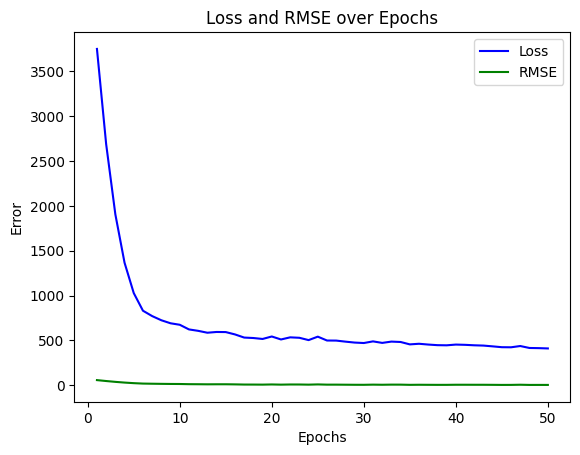

In [9]:
plt.plot(epochs, loss_array, label='Loss', color='blue')
plt.plot(epochs, rmse_array, label='RMSE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Loss and RMSE over Epochs')
plt.legend()
plt.show()

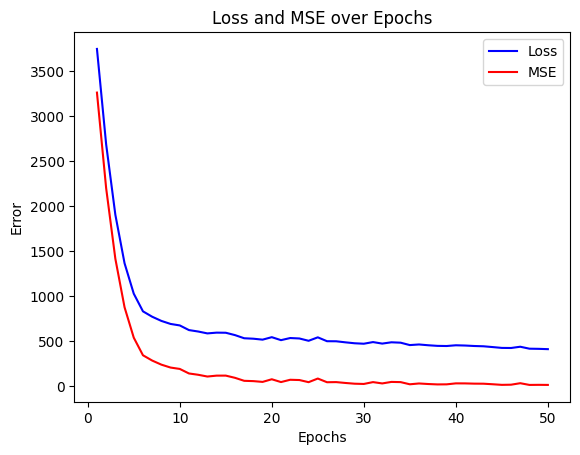

In [10]:
# Plotting Loss and MSE
plt.plot(epochs, loss_array, label='Loss', color='blue')
plt.plot(epochs, mse_array, label='MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Loss and MSE over Epochs')
plt.legend()
plt.show()

In [11]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf

def pred_and_plot(model, filename):
    img = load_and_prep_image(filename)  # Assuming you have a function to load and preprocess an image
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the index of the maximum prediction
    direction_index = tf.argmax(pred, axis=1).numpy()[0]  # Extracting the index of maximum prediction
    
    # Mapping index to direction label
    directions = ["East", "West", "North", "South"]  # Assuming these are the direction labels
    
    predicted_direction = directions[direction_index]
    
    # Plot the image and predicted value
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_direction}")
    plt.axis(False)
    plt.show()


1/1 [==============================] - 1s 819ms/step


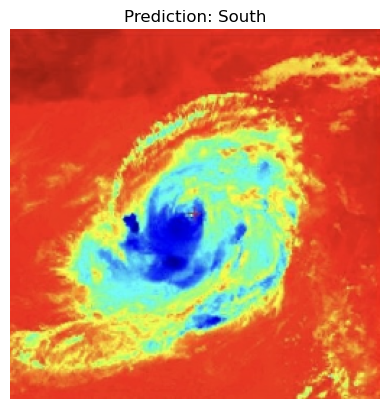

In [27]:
pred_and_plot(model_direction,"test_data\94.jpg")

1/1 [==============================] - 1s 952ms/step


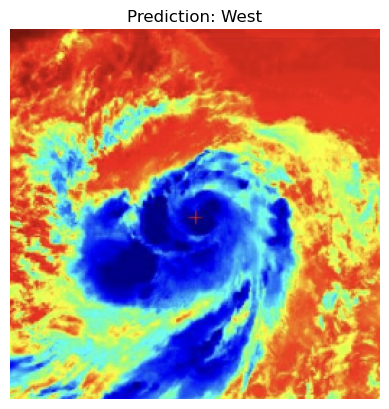

In [28]:
pred_and_plot(model_direction,"test_data\98.jpg")

1/1 [==============================] - 1s 833ms/step


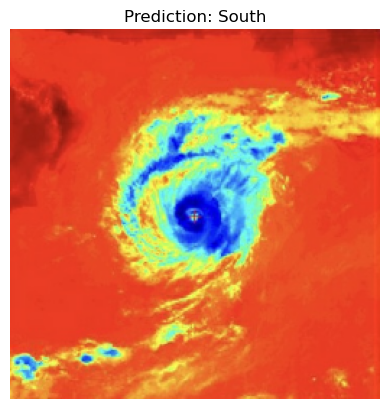

In [29]:
pred_and_plot(model_direction,"test_data/99.jpg")

In [30]:
import pickle
filename= "Trained_direction_model.sav"
a=open(filename,'wb')
pickle.dump(model_direction,a)
a.flush()
a.close()
